<a href="https://colab.research.google.com/github/RenatoCosta10031979/CRUD-basico-feito-em-Java-Web-Java-EE-/blob/main/2_1_cap_instalada_por_regiao_e_uf_xlsx_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Alunos: Nomes, Nomes**

Professores: Douglas Ribeiro e Franciane Rodrigues

#**Pergunta de negócio**: Análise exploratória de dados com a base de dados do ___ e indique possíveis oportunidades e/ou ameaças para o empreendimento.

---



# Base de Dados Informações gerais
TEXTO EXPLICATIVO Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

Fonte: LINK

## **Dicionário de dados**

*
*

> fonte:
*   links

## **Os 5W's**

* What (o que será feito?)

lorem ipsum lorem ipsum

* Why (por que será feito?)

lorem ipsum lorem ipsum

* Where (onde será feito?)

lorem ipsum lorem ipsum

* When (quando será feito?)

lorem ipsum

* Who (por quem será feito?)

lorem ipsum

# ETL
Extração, transformação, carregamento dos dados



## Install e Libs
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [1]:
!pip install gcsfs # instalaçao de biblioteca para interagir com google cloud

In [2]:
!pip install pandera # instalaçao de biblioteca para validar dados com pandera

In [3]:
import os
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.cloud import storage
from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [4]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

## Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

In [6]:
# Cria compartilhamento com Google Drive
drive.mount('/content/drive', force_remount=True)

# Arquivo a ser acessado na pasta compartilhada
target = 'projeto-final-ad2-e8-ae566c3a2c2b.json'

# Caminho completo da pasta compartilhada
folder = '/content/drive/MyDrive/Classroom/AD2 - Analista de Dados/ProjetoFinal'

# Acesso ao arquivo no colab
serviceAccount = os.path.join(folder, target)

Mounted at /content/drive


In [7]:
# Conexão com a conta do Google Cloud
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [8]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projeto-final-ad2-e8-ae566c3a2c2b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [9]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8') # nome do bucket
bucket.blob('projeto-final-ad2-e8/dados/brutos/excel/2_1_cap_instalada_por_regiao_e_uf.xlsx ') # nome do arquivo
path = 'gs://projeto-final-ad2-e8/dados/brutos/excel/2_1_cap_instalada_por_regiao_e_uf.xlsx' # gsutil



In [10]:
# Leitura e configuração dos arquivos extraidos
df = pd.read_excel(path)

### Pré Análise

In [11]:
# Visualização geral
df

,grupo,macro_grupo,ano,tipo_de_informacao,total
0,Brasil,Brasil,2013,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013,Geração (GWh),570834.647328
2,Brasil,Brasil,2014,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014,Geração (GWh),590542.338656
4,Brasil,Brasil,2015,Cap. Instalada (MW),140857.748378
...,...,...,...,...,...
555,Santa Catarina,Sul,2020,Geração (GWh),16590.335429
556,Santa Catarina,Sul,2021,Cap. Instalada (MW),5817.516860
557,Santa Catarina,Sul,2021,Geração (GWh),20602.443775
558,Santa Catarina,Sul,2022,Cap. Instalada (MW),5953.170600


In [12]:
# Visualização de forma aleatoria
df.sample(3)

,grupo,macro_grupo,ano,tipo_de_informacao,total
414,Tocantins,Norte,2020,Cap. Instalada (MW),2481.820000
505,Paraná,Sul,2015,Geração (GWh),99409.993008
416,Tocantins,Norte,2021,Cap. Instalada (MW),2489.628000


In [13]:
# Tamanho total de (linhas , colunas)
df.shape

(560, 5)

In [14]:
# Todos os tipos de dados presentes
df.dtypes

grupo                  object
macro_grupo            object
ano                     int64
tipo_de_informacao     object
total                 float64
dtype: object

In [15]:
# Contagem de observações para cada coluna
df.count()

grupo                 560
macro_grupo           560
ano                   560
tipo_de_informacao    560
total                 560
dtype: int64

In [16]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grupo               560 non-null    object 
 1   macro_grupo         560 non-null    object 
 2   ano                 560 non-null    int64  
 3   tipo_de_informacao  560 non-null    object 
 4   total               560 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [17]:
# Backup local
dfbackup1 = df.copy()

In [18]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
                Valores únicos para o atributo grupo:                 
----------------------------------------------------------------------

['Brasil' 'Distrito Federal' 'Goiás' 'Mato Grosso' 'Mato Grosso do Sul'
 'Alagoas' 'Bahia' 'Ceará' 'Maranhão' 'Paraíba' 'Pernambuco' 'Piauí'
 'Rio Grande do Norte' 'Sergipe' 'Acre' 'Amapá' 'Amazonas' 'Pará'
 'Rondônia' 'Roraima' 'Tocantins' 'Espírito Santo' 'Minas Gerais'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Rio Grande do Sul'
 'Santa Catarina']

----------------------------------------------------------------------
----------------------------------------------------------------------
             Valores únicos para o atributo macro_grupo:              
----------------------------------------------------------------------

['Brasil' 'Centro-Oeste' 'Nordeste' 'Norte' 'Sudeste' 'Sul']

----------------------------------------------------------------------
----------------

## Transformação
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

### Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [19]:
# Verificar se há valores duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
555    False
556    False
557    False
558    False
559    False
Length: 560, dtype: bool

In [20]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

grupo                 0
macro_grupo           0
ano                   0
tipo_de_informacao    0
total                 0
dtype: int64

In [21]:
# Verificando os valores presentes na coluna para identificar inconsistencias
#print(f'Valores presentes em coluna1: {pd.unique(df.coluna1)}')

In [22]:
# Descartando colunas
# df.drop(['coluna1',], axis=1, inplace=True)

In [23]:
#Backup
backup_bruto = df.copy()

### Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

Tipagem

In [24]:
#Criando um dataframe para realizar normalização dos dados
df_analise = df.copy()

In [25]:
# Convertendo a coluna 'ano' para datetime
df_analise['ano'] = pd.to_datetime(df_analise['ano'], format='%Y')

In [26]:
# Extraindo o ano usando o atributo .dt.year
df_analise.ano.astype('datetime64[ns]')
df_analise.ano.dt.year

0      2013
1      2013
2      2014
3      2014
4      2015
       ... 
555    2020
556    2021
557    2021
558    2022
559    2022
Name: ano, Length: 560, dtype: int64

In [27]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   grupo               560 non-null    object        
 1   macro_grupo         560 non-null    object        
 2   ano                 560 non-null    datetime64[ns]
 3   tipo_de_informacao  560 non-null    object        
 4   total               560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 22.0+ KB


Tradução

In [28]:
# Renomeando/Traduzindo colunas
#df.rename(columns={'grupo':'traducao',}, inplace=True)

In [29]:
# Examinando se as colunas foram alteradas
df.dtypes

grupo                  object
macro_grupo            object
ano                     int64
tipo_de_informacao     object
total                 float64
dtype: object

In [30]:
# Renomeando nomes de colunas

traducao = {
    'grupo': 'Grupo',
    'macro_grupo': 'Macro_grupo',
    'ano':'Ano',
    'tipo_de_informacao':'Tipo_de_informacao',
    'total': 'Total',
}
df_analise.rename(columns=traducao,inplace=True)

In [31]:
#Visualização do cabeçalho após a normalização
df_analise.head(1)

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.30306


In [32]:
# Examinando se os registros foram alterados
#pd.unique(df.traducao)

# **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [33]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Grupo               560 non-null    object        
 1   Macro_grupo         560 non-null    object        
 2   Ano                 560 non-null    datetime64[ns]
 3   Tipo_de_informacao  560 non-null    object        
 4   Total               560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 22.0+ KB


In [34]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'Grupo': pa.Column(pa.String),
    'Macro_grupo': pa.Column(pa.String),
    'Ano': pa.Column(pa.DateTime),
    'Tipo_de_informacao': pa.Column(pa.String),
    'Total': pa.Column(pa.Float)
})

schema.validate(df_analise)

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013-01-01,Geração (GWh),570834.647328
2,Brasil,Brasil,2014-01-01,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014-01-01,Geração (GWh),590542.338656
4,Brasil,Brasil,2015-01-01,Cap. Instalada (MW),140857.748378
...,...,...,...,...,...
555,Santa Catarina,Sul,2020-01-01,Geração (GWh),16590.335429
556,Santa Catarina,Sul,2021-01-01,Cap. Instalada (MW),5817.516860
557,Santa Catarina,Sul,2021-01-01,Geração (GWh),20602.443775
558,Santa Catarina,Sul,2022-01-01,Cap. Instalada (MW),5953.170600


## **Colunas Persistidas**

* coluna1

## Copia de segurança do tratamento - Backup

In [35]:
# Backup para analise
df_tratado = df_analise.copy()

## Load
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [36]:
# Upando para o Google Cloud

df_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/dataset_tratados_xlsx/2_1_cap_instalada_por_regiao_e_uf_tratado.xlsx', index=False)


In [37]:
df_tratado.shape


(560, 5)

In [38]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Grupo               560 non-null    object        
 1   Macro_grupo         560 non-null    object        
 2   Ano                 560 non-null    datetime64[ns]
 3   Tipo_de_informacao  560 non-null    object        
 4   Total               560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 22.0+ KB


# EDA
Análise exploratória de dados.
- Descrição de dados: identificação dos tipos de variáveis, dimensões dos dados, valores extremos e estatísticas descritivas.
- Visualização dos dados: criação de gráficos, tabelas e outros tipos de visualização para entender a distribuição e a relação entre as variáveis.
- Identificação de padrões: identificação de padrões, tendências, correlações e outras relações entre as variáveis.
- Testes estatísticos: aplicação de testes estatísticos para confirmar ou refutar hipóteses sobre os dados.

## Install e Libs
Instalações e bibliotecas necessárias para a análise de dados que não haviam sido importadas anteriormente.

## Preparação do Dados
Novo processo de transformação de dados caso seja necessário fazer algo a mais para as análises a serem feitas.

### **Estatisticas**

In [39]:
# Resumo de estatisticas descritivas
df.describe().round(2)

,ano,total
count,560.00,560.00
mean,2017.50,27427.15
std,2.87,83027.70
min,2013.00,37.62
25%,2015.00,2489.67
50%,2017.50,8320.11
75%,2020.00,20325.66
max,2022.00,677436.87


In [40]:
# Correlações de todas colunas quantitativas
df.corr()

,ano,total
ano,1.000000,0.021754
total,0.021754,1.000000


In [41]:
'''
def distfreq(dados, classes=None):
    # Verifica se o número de classes foi fornecido como parâmetro, caso
    # contrário, determina automaticamente. Se o número de dados for menor
    # ou igual a 25, define 5 classes, caso contrário, a quantidade de classes
    # será a raiz quadrada do número de de dados
    if classes is None:
        if len(dados) <= 25:
            classes = 5
        else:
            classes = round(len(dados) ** 0.5 + 0.5)
    else:
        pass

    # Ordena os dados em ordem crescente
    dados = sorted(dados)
    # Calcula a amplitude (diferença entre o maior e o menor valor)
    amplitude = max(dados) - min(dados)
    # Calcula o intervalo entre as classes
    intervalo = amplitude / classes
    # Cria uma lista para armazenar os limites dos intervalos
    intervalos = [dados[0]]
    for i in range(classes):
        intervalos.append((intervalos[i] + intervalo))

    # Imprime o cabeçalho da tabela
    print("-" * 100)
    print(f'{"Valores":^19}|{"Frequência":^19}|{"Freq. Acumulada":^19}|'
        + f'{"Frequência %":^19}|{"Freq. Acumulada %":^19}')
    print("-" * 100)

    a = 0
    b = 0

    # Laço para calcular as frequências para cada classe
    for i in range(classes):
        a = 0
        teste = f'{intervalos[i]:.2f} ---- {intervalos[i+1]:.2f}'

        # Laço para contar quantos valores estão dentro do intervalo atual
        for j in range(len(dados)):
            if dados[j] < intervalos[i + 1] + 0.000001:
                a = a + 1
            else:
                pass

        # Imprime os valores da classe atual e suas frequências
        print(f'{teste:^19}|{a - b:^19}|{a:^19}|{((a - b) / len(dados)):^19.2%}|{((a) / len(dados)):^19.2%}')

        # Atualiza o valor de b para a próxima iteração
        b = a

        # Imprime uma linha separadora
        print("-" * 100)

    # Imprime o final da tabela discriminando o total geral
    print(f'{"Total Geral":^19}|{a:^19}|{"":^19}|{"100,00%":^19}|{"":^19}')
    print("-"*100)
    return
'''

'\ndef distfreq(dados, classes=None):\n    # Verifica se o número de classes foi fornecido como parâmetro, caso\n    # contrário, determina automaticamente. Se o número de dados for menor\n    # ou igual a 25, define 5 classes, caso contrário, a quantidade de classes\n    # será a raiz quadrada do número de de dados\n    if classes is None:\n        if len(dados) <= 25:\n            classes = 5\n        else:\n            classes = round(len(dados) ** 0.5 + 0.5)\n    else:\n        pass\n\n    # Ordena os dados em ordem crescente\n    dados = sorted(dados)\n    # Calcula a amplitude (diferença entre o maior e o menor valor)\n    amplitude = max(dados) - min(dados)\n    # Calcula o intervalo entre as classes\n    intervalo = amplitude / classes\n    # Cria uma lista para armazenar os limites dos intervalos\n    intervalos = [dados[0]]\n    for i in range(classes):\n        intervalos.append((intervalos[i] + intervalo))\n\n    # Imprime o cabeçalho da tabela\n    print("-" * 100)\n    pr

In [42]:
# distfreq(df.loc[df.cidade == 'Londres']['preco_total'],154)

### Filtros e agrupamentos
Criar novas variáveis com base nos dados originais para permitir uma análise mais detalhada e avançada.

In [43]:
# Filtros, agrupamentos

In [44]:
df_tratado.head()

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013-01-01,Geração (GWh),570834.647328
2,Brasil,Brasil,2014-01-01,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014-01-01,Geração (GWh),590542.338656
4,Brasil,Brasil,2015-01-01,Cap. Instalada (MW),140857.748378


## Visualização

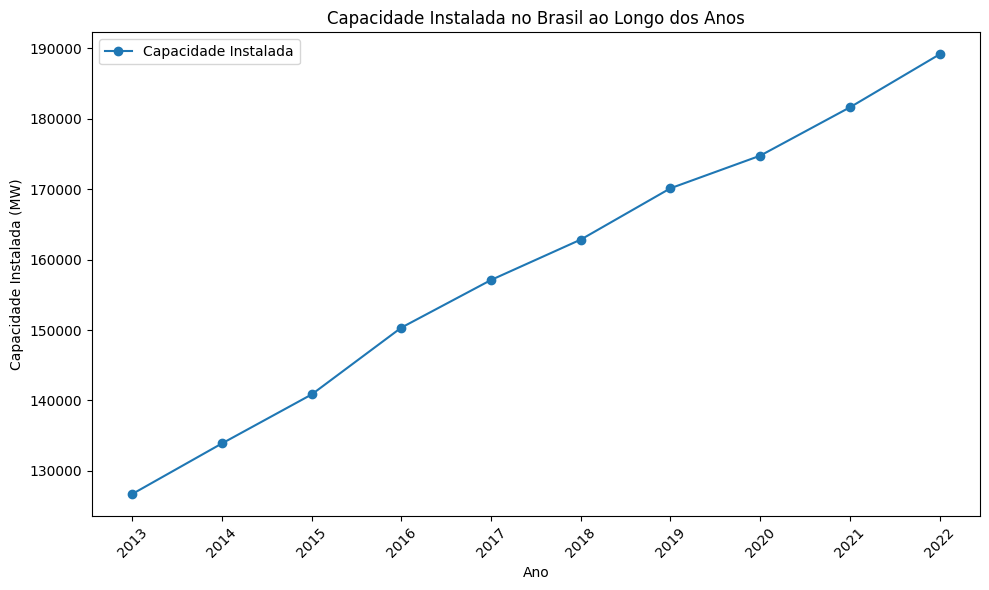

In [45]:
# Filtrando os dados para Brasil e Cap. Instalada (MW)
brasil_capacidade = df_tratado[(df_tratado['Macro_grupo'] == 'Brasil') & (df_tratado['Tipo_de_informacao'] == 'Cap. Instalada (MW)')]
# Criando gráfico de linha para Capacidade Instalada no Brasil ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(brasil_capacidade['Ano'], brasil_capacidade['Total'], marker='o', label='Capacidade Instalada')
plt.xlabel('Ano')
plt.ylabel('Capacidade Instalada (MW)')
plt.title('Capacidade Instalada no Brasil ao Longo dos Anos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo gráfico
plt.show()


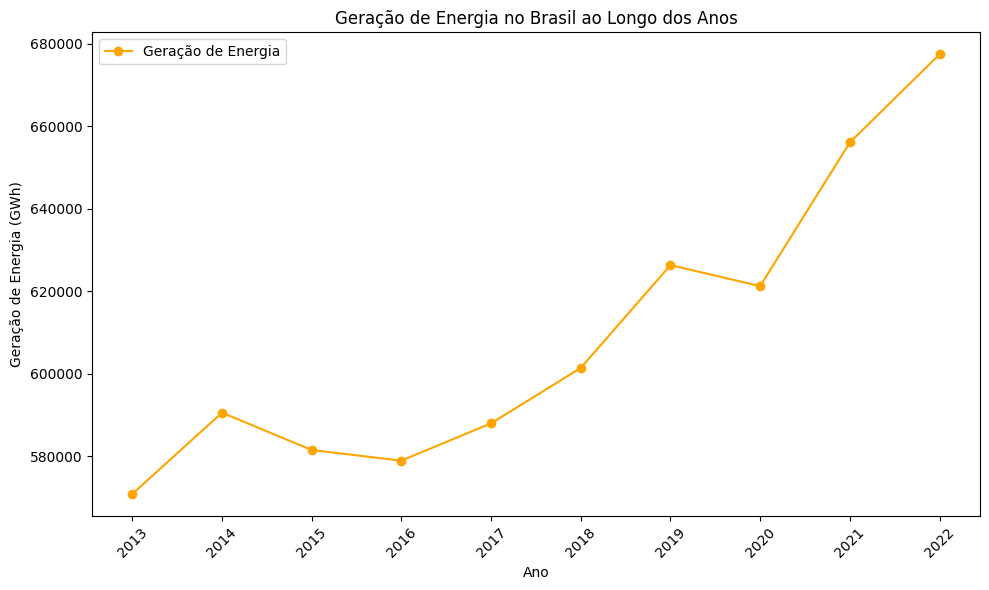

In [50]:
# Filtrando os dados para Brasil e Geração (GWh)
brasil_geracao = df_tratado[(df_tratado['Macro_grupo'] == 'Brasil') & (df_tratado['Tipo_de_informacao'] == 'Geração (GWh)')]
# Criando gráfico de linha para Geração de Energia no Brasil ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(brasil_geracao['Ano'], brasil_geracao['Total'], marker='o', color='orange', label='Geração de Energia')
plt.xlabel('Ano')
plt.ylabel('Geração de Energia (GWh)')
plt.title('Geração de Energia no Brasil ao Longo dos Anos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# Exibindo gráfico
plt.show()

In [47]:
# Fazendo o drop das linhas onde 'Grupo' é igual a 'Brasil'
#df_tratado = df_tratado.drop(df_tratado[df_tratado['Grupo'] == 'Brasil'].index)

In [51]:
#capacidade_por_regiao_estado = capacidade_instalada.groupby(['Grupo' !='Brasil', 'Macro_grupo']).sum()
brasil_geracao = df_tratado[(df_tratado['Grupo']) & (df_tratado['Tipo_de_informacao'] == 'Geração (GWh)')]
#capacidade_por_regiao_estado = capacidade_instalada.query("Grupo = 'Brasil'").groupby(['Grupo', 'Macro_grupo']).sum()

# Reformatando o índice para facilitar a plotagem
#capacidade_por_regiao_estado.reset_index(inplace=True)

#Ordenando o DataFrame em ordem decrescente de capacidade instalada
capacidade_por_regiao_estado = capacidade_por_regiao_estado.sort_values(by='Total', ascending=False)

# Criando gráfico de barras para Capacidade Instalada por Região e Estado
plt.figure(figsize=(12, 6))
plt.bar(capacidade_por_regiao_estado['Macro_grupo'], capacidade_por_regiao_estado['Total'])
plt.xlabel('Região')
plt.ylabel('Capacidade Instalada (MW)')
plt.title('Capacidade Instalada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo gráfico
plt.show()

TypeError: ignored

In [ ]:
# Agrupando por região e estado e somando a capacidade instalada
capacidade_por_regiao_estado = capacidade_instalada.groupby(['Grupo', 'Macro_grupo']).sum()

# Reformatando o índice para facilitar a plotagem
capacidade_por_regiao_estado.reset_index(inplace=True)

# Ordenando o DataFrame em ordem decrescente de capacidade instalada
capacidade_por_regiao_estado = capacidade_por_regiao_estado.sort_values(by='Total', ascending=False)

# Criando gráfico de barras para Capacidade Instalada por Região e Estado
plt.figure(figsize=(12, 6))
#plt.bar(capacidade_por_regiao_estado["Grupo != 'Brasil'"], capacidade_por_regiao_estado['Total'])
plt.bar(capacidade_por_regiao_estado[capacidade_por_regiao_estado['Grupo'] != 'Brasil']['Grupo'], capacidade_por_regiao_estado[capacidade_por_regiao_estado['Grupo'] != 'Brasil']['Total'])
plt.xlabel('Região e Estado')
plt.ylabel('Capacidade Instalada (MW)')
plt.title('Capacidade Instalada por Estado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo gráfico
plt.show()

In [52]:
# Criando gráfico de barras horizontais para Geração de Energia por Região e Estado
plt.figure(figsize=(10, 6))
plt.barh(geracao_energia['Grupo'], geracao_energia['Total'])
plt.xlabel('Geração de Energia (GWh)')
plt.ylabel('Região e Estado')
plt.title('Geração de Energia por Região e Estado')
plt.tight_layout()

# Exibindo gráfico
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

### Análise Descritiva
- Estatísticas descritivas do conjunto de dados;
- Distribuição das variáveis numéricas e categóricas;
- Identificação de outliers e tratamento, se necessário

### Análise de Correlação
- Identificação de correlação entre as variáveis;
- Verificação de multicolinearidade;
- Visualização de gráficos de correlação, como heatmap e pairplot

### Análise de Grupos
- Identificação de grupos no conjunto de dados;
- Visualização de gráficos de dispersão e boxplot para cada grupo

### Análise Temporal
- Verificação de tendências temporais;
- Visualização de gráficos de linha, barras e scatterplot para cada período de tempo


### Análise Geoespacial (se aplicável)
- Verificação de padrões geoespaciais;
- Visualização de mapas e gráficos de pontos para cada localização

## Conclusão da EDA
Resumo das principais conclusões e insights obtidos a partir da análise exploratória, sugestões para próximos passos da análise ou possíveis ações a serem tomadas.